# Dragon Real Estate Price Predictor

In [1]:
import pandas as pd
import numpy as np

In [50]:
housing  = pd.read_csv("C:\\Users\\Dell\\Downloads\\Business Analytics with R(classroom notes)\\DataSets\\DragonRealEstateHousing.csv")
housing.head()
housing.info()
housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM         506 non-null float64
ZN           506 non-null float64
INDUS        506 non-null float64
CHAS         506 non-null int64
NOX          506 non-null float64
RM           500 non-null float64
AGE          506 non-null float64
DIS          506 non-null float64
RAD          506 non-null int64
TAX          506 non-null int64
PTRATIO      506 non-null float64
LSTAT        506 non-null float64
MEDV         506 non-null float64
CAT. MEDV    506 non-null int64
dtypes: float64(10), int64(4)
memory usage: 55.4 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,500.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283686,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704906,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884750,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.205000,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.626000,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002811B5280F0>,
      dtype=object)

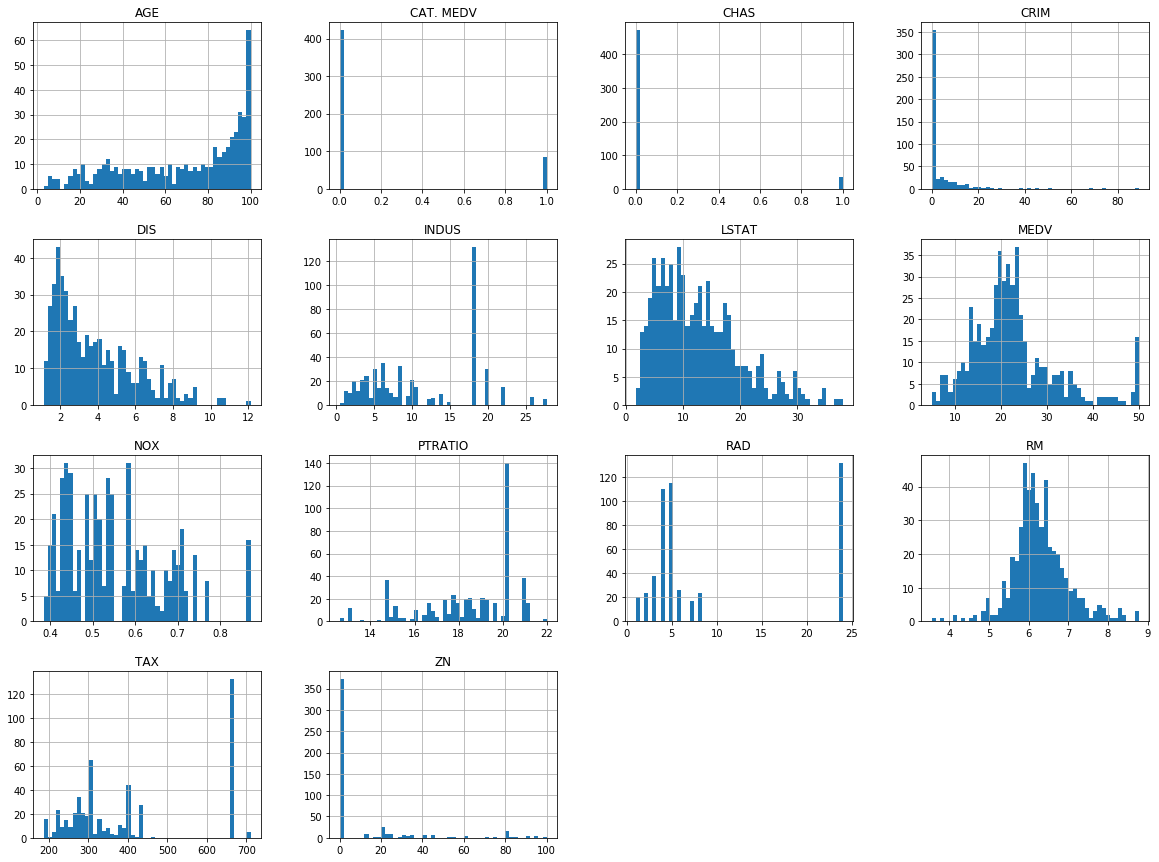

In [5]:
housing.hist(bins = 50, figsize=(20, 15))

## Train Test Splitting

In [6]:
"""
def split_tarin_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
"""

'\ndef split_tarin_test(data, test_ratio):\n    np.random.seed(42)\n    shuffled = np.random.permutation(len(data))\n    test_set_size = int(len(data) * test_ratio)\n    test_indices = shuffled[:test_set_size]\n    train_indices = shuffled[test_set_size:]\n    return data.iloc[train_indices], data.iloc[test_indices]\n'

In [7]:
#train_set, test_set = split_tarin_test(housing, 0.2) 

In [8]:
#print("Length of Train Data:",len(train_set))
#print("Length of Test Data:",len(test_set))

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print("Length of Train Data:",len(train_set))
print("Length of Test Data:",len(test_set))

Length of Train Data: 404
Length of Test Data: 102


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["CHAS"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [11]:
strat_train_set["CHAS"].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [12]:
strat_test_set["CHAS"].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

## Looking For Correlations

In [13]:
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending = False)

MEDV         1.000000
CAT. MEDV    0.789789
RM           0.695419
ZN           0.360445
DIS          0.249929
CHAS         0.175260
AGE         -0.376955
RAD         -0.381626
CRIM        -0.388305
NOX         -0.427321
TAX         -0.468536
INDUS       -0.483725
PTRATIO     -0.507787
LSTAT       -0.737663
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002811F4255C0>,
      dtype=object)

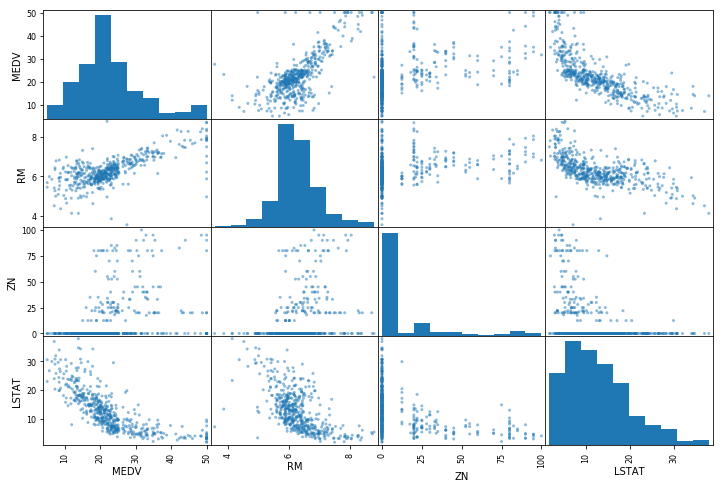

In [14]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

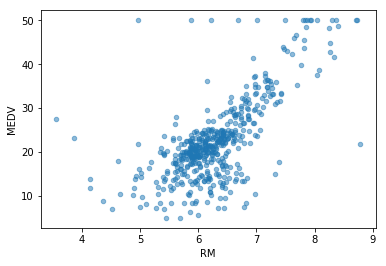

In [15]:
 housing.plot(kind = "scatter", x = "RM", y = "MEDV", alpha = 0.5)

## Trying out Attribute Combinations

In [16]:
housing["TAXRM"] = housing["TAX"] / housing["RM"]

In [17]:
housing.head()
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV,TAXRM
count,506.000000,506.000000,506.000000,506.000000,506.000000,500.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,500.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283686,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008,67.066184
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704906,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456,31.390898
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000,24.645639
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884750,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000,44.094178
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.205000,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000,53.774674
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.626000,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000,98.317507
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000,187.026116


In [18]:
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending  = False)

MEDV         1.000000
CAT. MEDV    0.789789
RM           0.695419
ZN           0.360445
DIS          0.249929
CHAS         0.175260
AGE         -0.376955
RAD         -0.381626
CRIM        -0.388305
NOX         -0.427321
TAX         -0.468536
INDUS       -0.483725
PTRATIO     -0.507787
TAXRM       -0.540746
LSTAT       -0.737663
Name: MEDV, dtype: float64

In [19]:
housing = strat_train_set.drop("MEDV", axis = 1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [20]:
# To take care of missing attributes, you have three options:
#1) Get rid off the missing data points.

    #   housing.dropna(subset = ["RM"])

#2) Get rid off the whole attribute

    #   housing.drop("RM", axis = 1)

#3) Set the value to 0, mean or median

median = housing["RM"].median()
housing["RM"].fillna(median) 

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
411    6.657
250    6.487
100    6.727
429    6.380
57     6.816
413    5.155
115    5.928
490    5.093
199    6.975
494    5.926
142    5.403
113    6.092
468    5.926
400    5.987
247    6.226
151    5.404
408    5.617
68     5.594
365    3.561
81     6.619
93     6.211
456    5.976
116    6.176
27     6.047
234    6.726
       ...  
433    6.436
430    6.348
479    6.229
438    5.935
38     5.966
18     5.456
97     8.069
266    7.014
133    5.822
449    6.417
477    5.304
171    5.880
180    7.765
158    6.066
279    6.812
109    6.229
82     6.302
386    4.652
418    5.957
126    6.209
446    6.341
101    6.781
277    6.826
405    5.683
367    3.863
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy  = "median")
imputer.fit(housing)


SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [22]:
imputer.statistics_.shape

(13,)

In [23]:
X = imputer.transform(housing)
X

array([[4.81900e-02, 8.00000e+01, 3.64000e+00, ..., 1.64000e+01,
        6.57000e+00, 0.00000e+00],
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 1.70000e+01,
        5.99000e+00, 0.00000e+00],
       [4.87141e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        1.86800e+01, 0.00000e+00],
       ...,
       [8.18700e-02, 0.00000e+00, 2.89000e+00, ..., 1.80000e+01,
        3.57000e+00, 1.00000e+00],
       [4.75237e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        1.81300e+01, 0.00000e+00],
       [4.56000e-02, 0.00000e+00, 1.38900e+01, ..., 1.64000e+01,
        1.35100e+01, 0.00000e+00]])

In [24]:
housing_tr = pd.DataFrame(X, columns = housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,CAT. MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.277089,69.039851,3.746210,9.735149,412.341584,18.473267,12.791609,0.163366
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.710793,28.258248,2.099057,8.731259,168.672623,2.129243,7.235740,0.370158
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,1.730000,0.000000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,6.847500,0.000000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,11.570000,0.000000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,17.102500,0.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,36.980000,1.000000


## Scikit-learn Design

Primarily three types of objects:
    1. Estimators - It estimates some parameters based on the dataset(E.g - Imputer)
                    It has a "fit" method and "transform" method
                    Fit method fits the dataset and calculated the internal parameters
        
    2. Transformers - tranforms method takes input and returns output based on the learnings from fir(). 
                    It also ahas a convenience function called fit_transform() which fits and then transforms.  
    
    3. Predictors - LinearRegression modelis an example of predictor. fit() and predict() are two common functions. It also 
                    gives score() function which will evaluate the predictions.

## Feature Scaling

Primarily two types of feature scaling methods :
1. Min-max scaling(Normalization)
    (value - min)/(max - min)
    Scikit-Learn provides a class called MinMaxScaler for this 
    
2. Standardization
    (value - min)/std. dev.
    Sklearn provides a class called StandardScalar for this 
    

## Creating a Pipeline

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    # add as many as you want in your pipeline.....
    ("std_scaler", StandardScaler()),
    
]) 

In [26]:
 housing_num_tr = my_pipeline.fit_transform(housing)

In [27]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
        -0.86091034, -0.44188943],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
        -0.94116739, -0.44188943],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.81480158, -0.44188943],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
        -1.27603303,  2.26300953],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.73869575, -0.44188943],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.09940681, -0.44188943]])

## Selecting a desired model for Dragon Real Estates

In [28]:
housing_num_tr.shape

(404, 13)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = DecisionTreeRegressor()
#model = LinearRegression()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [30]:
some_data = housing.iloc[:5]

In [31]:
some_labels  = housing_labels.iloc[:5]

In [32]:
prepared_data = my_pipeline.transform(some_data)

In [33]:
model.predict(prepared_data)

array([22.38, 25.86, 16.51, 23.28, 23.77])

In [34]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [35]:
from sklearn.metrics import mean_squared_error

housing_predictions  = model.predict(housing_num_tr)
#lin_mse = mean_squared_error(housing_labels, housing_predictions)
#lin_rmse = np.sqrt(lin_mse)

mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [36]:
rmse 

1.170354943198561

# Using better  evaluation technique - Cross Validation

In [37]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-score)
rmse_scores

array([2.87166689, 2.26409999, 3.14396829, 2.4002068 , 2.77776169,
       2.34534592, 2.72253053, 3.12601304, 2.7589459 , 2.94233538])

In [40]:
def print_scores(score):
    print("Scores:", score)
    print("Mean:", score.mean())
    print("Standard Deviation:", score.std())

In [41]:
print_scores(rmse_scores)


Scores: [2.87166689 2.26409999 3.14396829 2.4002068  2.77776169 2.34534592
 2.72253053 3.12601304 2.7589459  2.94233538]
Mean: 2.7352874436769214
Standard Deviation: 0.29496309686493644


In [49]:
# from joblib import dump, load
# dump(model, "Dagon.joblib")

## Testing the model on test data

In [47]:
X_test = strat_test_set.drop("MEDV", axis = 1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predicitons = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predicitons)
final_rmse = np.sqrt(final_mse)

In [48]:
final_rmse

2.832345733299728